In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bayesian import BayesianLinearRegression, SklearnBayesianLinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/HeatApproachYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,02 SLB,7,191,2022-1,30.77,0.000000,...,0.856748,0.000000,0,0,0,0,-3.025000,28.012944,-34.487056,0.0
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,02 SLB,7,192,2022-1,48.22,30.770000,...,1.103224,0.243718,0,0,0,0,-0.279167,32.898193,-29.601807,0.0
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,02 SLB,7,193,2022-1,30.53,39.495000,...,1.023044,-0.083744,0,0,0,0,2.033333,36.760487,-25.739513,0.0
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,02 SLB,7,194,2022-1,42.26,36.506667,...,1.066796,0.040438,0,0,0,0,0.066667,31.939524,-30.560476,0.0
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,02 SLB,7,195,2022-1,38.49,37.945000,...,1.073339,0.003074,0,0,0,0,-3.700000,26.498206,-36.001794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483097,2023-06-03,f454e660,SE-fcdf259d-0044-0,4150,41 Fjällko,10,347,2023-3,12.67,14.652000,...,1.030966,-0.045706,0,1,0,0,12.666667,53.132530,-9.367470,0.0
483098,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,41 Fjällko,10,348,2023-3,22.31,14.030000,...,1.108549,0.070579,0,1,0,0,13.079167,56.726870,-5.773130,0.0
483099,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,41 Fjällko,10,349,2023-3,12.84,14.984000,...,1.109278,-0.006853,0,1,0,0,14.237500,58.482418,-4.017582,0.0
483100,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,41 Fjällko,10,350,2023-3,9.47,14.892000,...,1.095617,-0.021300,0,1,0,0,15.345833,60.546358,-1.953642,0.0


In [122]:
# Check data types
milk_data.dtypes

Date                          datetime64[ns]
FarmName_Pseudo                       object
SE_Number                             object
Age                                    Int64
BreedName                             object
LactationNumber                        Int64
DaysInMilk                             Int64
YearSeason                            object
DailyYield                           float64
PreviousDailyYield                   float64
DailyYieldChange                     float64
ExpectedYield                        float64
NormalizedDailyYield                 float64
NormalizedDailyYieldChange           float64
HeatStress                             Int64
Temp15Threshold                        Int64
HW                                     Int64
cum_HW                                 Int64
MeanTemperature                      float64
MeanTHI_adj                          float64
HeatLoad                             float64
CumulativeHeatLoad                   float64
dtype: obj

In [123]:
# Check NaN values
milk_data.isnull().sum()

Date                          0
FarmName_Pseudo               0
SE_Number                     0
Age                           0
BreedName                     0
LactationNumber               0
DaysInMilk                    0
YearSeason                    0
DailyYield                    0
PreviousDailyYield            0
DailyYieldChange              0
ExpectedYield                 0
NormalizedDailyYield          0
NormalizedDailyYieldChange    0
HeatStress                    0
Temp15Threshold               0
HW                            0
cum_HW                        0
MeanTemperature               0
MeanTHI_adj                   0
HeatLoad                      0
CumulativeHeatLoad            0
dtype: int64

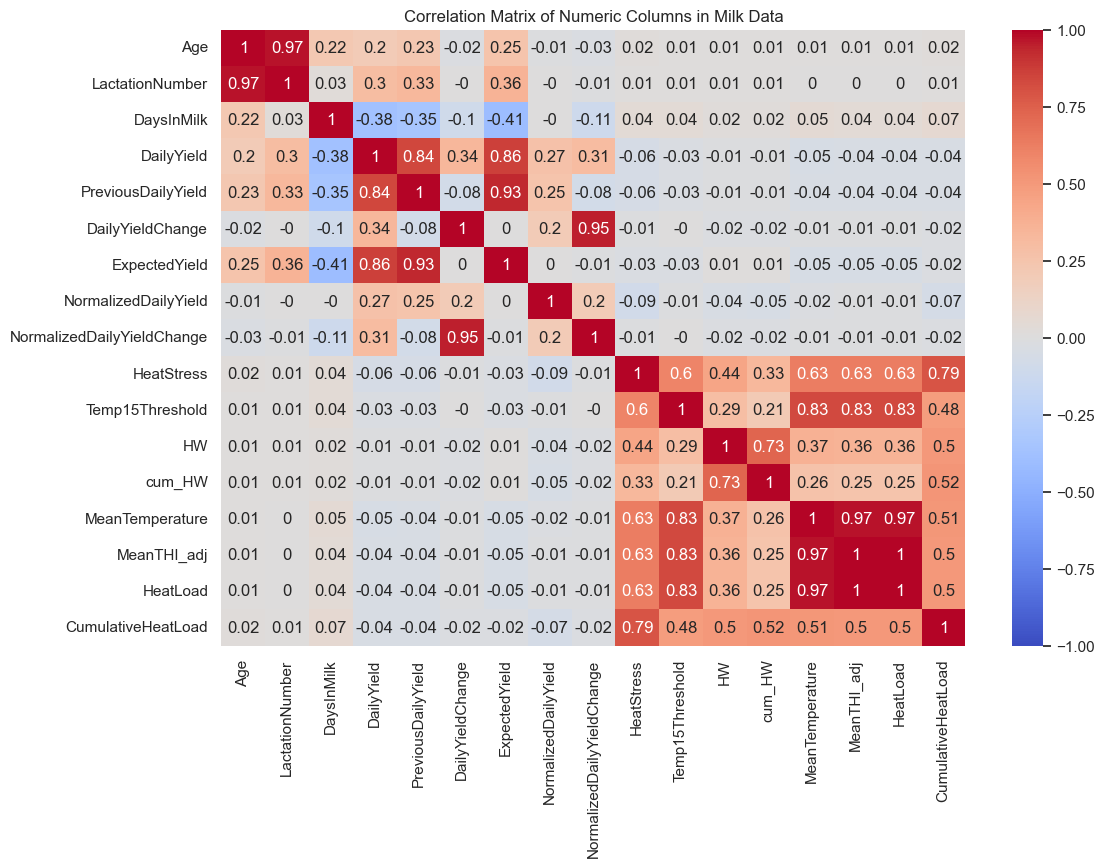

In [124]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

In [125]:
# Output the correlation matrix here in the notebook with two decimals
corr_matrix.round(2)

,Age,LactationNumber,DaysInMilk,DailyYield,PreviousDailyYield,DailyYieldChange,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad
Age,1.00,0.97,0.22,0.20,0.23,-0.02,0.25,-0.01,-0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02
LactationNumber,0.97,1.00,0.03,0.30,0.33,-0.00,0.36,-0.00,-0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01
DaysInMilk,0.22,0.03,1.00,-0.38,-0.35,-0.10,-0.41,-0.00,-0.11,0.04,0.04,0.02,0.02,0.05,0.04,0.04,0.07
DailyYield,0.20,0.30,-0.38,1.00,0.84,0.34,0.86,0.27,0.31,-0.06,-0.03,-0.01,-0.01,-0.05,-0.04,-0.04,-0.04
PreviousDailyYield,0.23,0.33,-0.35,0.84,1.00,-0.08,0.93,0.25,-0.08,-0.06,-0.03,-0.01,-0.01,-0.04,-0.04,-0.04,-0.04
DailyYieldChange,-0.02,-0.00,-0.10,0.34,-0.08,1.00,0.00,0.20,0.95,-0.01,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.02
ExpectedYield,0.25,0.36,-0.41,0.86,0.93,0.00,1.00,0.00,-0.01,-0.03,-0.03,0.01,0.01,-0.05,-0.05,-0.05,-0.02
NormalizedDailyYield,-0.01,-0.00,-0.00,0.27,0.25,0.20,0.00,1.00,0.20,-0.09,-0.01,-0.04,-0.05,-0.02,-0.01,-0.01,-0.07
NormalizedDailyYieldChange,-0.03,-0.01,-0.11,0.31,-0.08,0.95,-0.01,0.20,1.00,-0.01,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.02
HeatStress,0.02,0.01,0.04,-0.06,-0.06,-0.01,-0.03,-0.09,-0.01,1.00,0.60,0.44,0.33,0.63,0.63,0.63,0.79


# Now we start modeling

**The aim is to find a quantitative factor for each farm which tells us approximately how much does heatstress affect the milk yield on that specific farm.**

## Farm a624fb9a

### Block 1: Model Training and Relative Change Calculation

In this block, we train a Bayesian linear regression model for each combination of features to determine the impact of heat stress on milk production. We calculate the relative change in normalized daily yield for each farm under heat stress and no heat stress conditions.

**Process:**
1. **Data Preparation**: Filter the dataset for the specific farm and split it based on the `HeatStress` condition into training and validation sets.
2. **Feature Scaling**: Scale the continuous features (MeanTemperature, MeanTHI_adj) in the training sets using `StandardScaler`.
3. **Model Training**: For each feature combination:
   - Define priors based on the mean and variance of the normalized daily yield and selected features from the training data.
   - Initialize and fit a Bayesian linear regression model on the training data.
   - Calculate the relative change in normalized daily yield for the offset (baseline) in percentage terms using the training data.
4. **Output**: Print the prior and posterior means and standard deviations for each feature combination and the relative change percentage.

This block helps identify how different features affect milk production under varying heat stress conditions using training data.

In [126]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = 'a624fb9a'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Separate data based on HeatStress condition
data_heatstress = farm_data[farm_data['HeatStress'] == 1]
data_no_heatstress = farm_data[farm_data['HeatStress'] == 0]

# Split the data into train and validation sets
train_heatstress, val_heatstress = train_test_split(data_heatstress, test_size=0.3, random_state=42)
train_no_heatstress, val_no_heatstress = train_test_split(data_no_heatstress, test_size=0.3, random_state=42)

# Define the feature combinations
feature_combinations = [
    ['MeanTemperature', 'HW'],
    ['MeanTemperature', 'cum_HW'],
    ['MeanTHI_adj', 'HW'],
    ['MeanTHI_adj', 'cum_HW']
]

# Function to scale specified features
def scale_features(data, features_to_scale):
    scaler = StandardScaler()
    data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
    return data, scaler

# Scale MeanTemperature and MeanTHI_adj features in the training sets
features_to_scale = ['MeanTemperature', 'MeanTHI_adj']
train_heatstress, heatstress_scaler = scale_features(train_heatstress.copy(), features_to_scale)
train_no_heatstress, no_heatstress_scaler = scale_features(train_no_heatstress.copy(), features_to_scale)

# Function to fit and print model results
def fit_and_print_results(train_data, features, condition):
    print(f"\nSelected features for {condition}: {features}")

    # Calculate prior means for the features after scaling
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)

    # Print the results
    print(f"\nPosterior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Print relative change in percentage terms
    print(f"\nRelative change for offset in percentage terms for {condition}: {relative_change_percentage:.2f}%")

    return relative_change_percentage

# Train the model with the feature combinations on the training set and print results
for features in feature_combinations:
    relative_change_heatstress = fit_and_print_results(train_heatstress, features, "HeatStress = 1")
    relative_change_no_heatstress = fit_and_print_results(train_no_heatstress, features, "HeatStress = 0")

Mean of NormalizedDailyYield: 1.000214161560042
Standard Deviation of NormalizedDailyYield: 0.10190530213781133
Variance of NormalizedDailyYield: 0.010384690603798616

Selected features for HeatStress = 1: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 1.000214161560042, std_dev = 0.10190530213781133
MeanTemperature: mean = -5.104071155102741e-16, std_dev = 1.0000616123964725
HW: mean = 0.17865943814687038, std_dev = 0.38309049309667315

Posterior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.9529572458465063, std_dev = 0.0014440016945896153
MeanTemperature: mean = 0.016104346562111602, std_dev = 0.0014325803069930069
HW: mean = 0.016011607652032675, std_dev = 0.0037395805660364306

Relative change for offset in percentage terms for HeatStress = 1: -4.72%

Selected features for HeatStress = 0: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 0

### Block 2: Cross-Validation for Feature Selection

This block performs cross-validation to identify the best feature combination that minimizes the mean squared error (MSE) in predicting the normalized daily yield.

**Process:**
1. **Feature Combinations**: Iterate over predefined feature combinations.
2. **Data Scaling**: Scale the validation data for continuous features using the scalers fitted on the training data.
3. **Cross-Validation**: For each feature combination:
   - Split the validation data into 5 folds for cross-validation.
   - Train and validate the Bayesian linear regression model on each fold of the validation data.
   - Calculate the MSE for each fold and compute the mean and standard deviation of the MSE.
4. **Best Feature Selection**: Track the feature combination with the lowest mean MSE.

**Output**: Print the best feature combination and its corresponding MSE for both heat stress and no heat stress conditions.

This block ensures that we select the most predictive features for our model using validation data.


In [127]:
# Function to fit the model and return cross-validation scores
def fit_and_cross_validate(train_data, features, condition, prior_mean, prior_cov, beta):
    # Ensure data types are correct
    X_train = train_data[features].astype(np.float64).values
    y_train = train_data[target].astype(np.float64).values

    # Initialize the model with the current feature combination
    sklearn_model = SklearnBayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )

    # Perform cross-validation with MSE
    cv_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = -cv_scores.mean()  # Convert from negative MSE to MSE
    std_cv_score = cv_scores.std()

    print(f"Cross-validation MSE for features {features} ({condition}): {mean_cv_score:.4f} ± {std_cv_score:.4f}")

    return mean_cv_score

# Function to perform cross-validation and calculate MSE for each feature combination
def cross_validate_feature_combinations(val_data, feature_combinations, condition, scaler, features_to_scale):
    best_features = None
    lowest_mse = float('inf')

    for features in feature_combinations:
        val_data_scaled = val_data.copy()

        # Scale only the continuous features using the provided scaler
        if any(feature in features_to_scale for feature in features):
            val_data_scaled[features_to_scale] = scaler.transform(val_data[features_to_scale])

        # Ensure data types are correct
        X_val = val_data_scaled[features].astype(np.float64).values
        y_val = val_data_scaled[target].astype(np.float64).values

        # Calculate prior means for the features after scaling
        prior_mean_values = [val_data_scaled[feature].mean() for feature in features]

        # Define priors
        prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
        prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
        beta = 1 / normalized_variance

        # Get cross-validation MSE
        mean_cv_score = fit_and_cross_validate(val_data_scaled, features, condition, prior_mean, prior_cov, beta)

        # Check if this is the best model so far
        if mean_cv_score < lowest_mse:
            lowest_mse = mean_cv_score
            best_features = features

    return best_features, lowest_mse

# Cross-validate on the validation data and select the best feature combination
best_features_heatstress, lowest_mse_heatstress = cross_validate_feature_combinations(val_heatstress.copy(), feature_combinations, "HeatStress = 1", heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 1 is {best_features_heatstress} with an MSE of {lowest_mse_heatstress:.4f}.\n")

best_features_no_heatstress, lowest_mse_no_heatstress = cross_validate_feature_combinations(val_no_heatstress.copy(), feature_combinations, "HeatStress = 0", no_heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 0 is {best_features_no_heatstress} with an MSE of {lowest_mse_no_heatstress:.4f}.")

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 1): 0.0123 ± 0.0008
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 1): 0.0124 ± 0.0008
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 1): 0.0124 ± 0.0008
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 1): 0.0124 ± 0.0008

The best feature combination in terms of the lowest MSE for HeatStress = 1 is ['MeanTemperature', 'HW'] with an MSE of 0.0123.

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 0): 0.0088 ± 0.0008
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 0): 0.0088 ± 0.0008
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 0): 0.0088 ± 0.0008
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 0): 0.0088 ± 0.0008

The best feature combination in terms of the lowest MSE for HeatStress = 0 is ['MeanTHI_adj', 'HW'] with an MSE of 0.0

### Block 3: Model Fitting on Entire Dataset and Relative Change Calculation

In this block, we fit the Bayesian linear regression model using the best features identified in Block 2 on the entire dataset for each farm. We calculate the relative change in normalized daily yield for the offset under heat stress and no heat stress conditions.

**Process:**
1. **Feature Scaling**: Scale the features in the entire dataset using the previously defined scalers from the training data.
2. **Model Training**: For the best feature combination determined from the cross-validation:
   - Define priors based on the mean and variance of the normalized daily yield and selected features from the entire dataset.
   - Initialize and fit a Bayesian linear regression model on the entire dataset.
   - Calculate the relative change in normalized daily yield for the offset (baseline) in percentage terms using the entire dataset.
3. **Output**: Create a DataFrame containing the relative changes in normalized daily yield for each farm under heat stress and no heat stress conditions.

This block provides a comprehensive view of how heat stress affects milk production across the entire dataset.


In [128]:
# Function to fit model on entire dataset and calculate relative change for offset
def fit_model_and_calculate_relative_change(data, features, condition, scaler, features_to_scale, normalized_mean, normalized_variance):
    # Scale the features using the provided scaler
    if any(feature in features_to_scale for feature in features):
        data.loc[:, features_to_scale] = scaler.transform(data[features_to_scale])
    
    # Calculate prior means for the features after scaling
    prior_mean_values = [data[feature].mean() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Initialize and fit the model on the entire dataset with the best features
    model = BayesianLinearRegression(
        dataframe=data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)
    
    return relative_change_percentage

# Fit the best model on the entire dataset using the best features from Block 2
relative_change_entire_heatstress = fit_model_and_calculate_relative_change(
    data_heatstress.copy(), best_features_heatstress, "HeatStress = 1", heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)
relative_change_entire_no_heatstress = fit_model_and_calculate_relative_change(
    data_no_heatstress.copy(), best_features_no_heatstress, "HeatStress = 0", no_heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)

# Create results DataFrame
results_df = pd.DataFrame({
    'FarmName_Pseudo': pd.Series(dtype='object'),
    'Relative Change HeatStress = 1 (%)': pd.Series(dtype='float64'),
    'Relative Change HeatStress = 0 (%)': pd.Series(dtype='float64')
})

# Create a new DataFrame row
new_row = pd.DataFrame({
    'FarmName_Pseudo': [farm_id],
    'Relative Change HeatStress = 1 (%)': [relative_change_entire_heatstress],
    'Relative Change HeatStress = 0 (%)': [relative_change_entire_no_heatstress]
})

# Append the new row to the results DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,FarmName_Pseudo,Relative Change HeatStress = 1 (%),Relative Change HeatStress = 0 (%)
0,a624fb9a,-4.707857,1.065139


# Now we do the same for the rest of the farms

## Farm 5c06d92d

In [129]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = '5c06d92d'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Separate data based on HeatStress condition
data_heatstress = farm_data[farm_data['HeatStress'] == 1]
data_no_heatstress = farm_data[farm_data['HeatStress'] == 0]

# Split the data into train and validation sets
train_heatstress, val_heatstress = train_test_split(data_heatstress, test_size=0.3, random_state=42)
train_no_heatstress, val_no_heatstress = train_test_split(data_no_heatstress, test_size=0.3, random_state=42)

# Define the feature combinations
feature_combinations = [
    ['MeanTemperature', 'HW'],
    ['MeanTemperature', 'cum_HW'],
    ['MeanTHI_adj', 'HW'],
    ['MeanTHI_adj', 'cum_HW']
]

# Function to scale specified features
def scale_features(data, features_to_scale):
    scaler = StandardScaler()
    data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
    return data, scaler

# Scale MeanTemperature and MeanTHI_adj features in the training sets
features_to_scale = ['MeanTemperature', 'MeanTHI_adj']
train_heatstress, heatstress_scaler = scale_features(train_heatstress.copy(), features_to_scale)
train_no_heatstress, no_heatstress_scaler = scale_features(train_no_heatstress.copy(), features_to_scale)

# Function to fit and print model results
def fit_and_print_results(train_data, features, condition):
    print(f"\nSelected features for {condition}: {features}")

    # Calculate prior means for the features after scaling
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)

    # Print the results
    print(f"\nPosterior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Print relative change in percentage terms
    print(f"\nRelative change for offset in percentage terms for {condition}: {relative_change_percentage:.2f}%")

    return relative_change_percentage

# Train the model with the feature combinations on the training set and print results
for features in feature_combinations:
    relative_change_heatstress = fit_and_print_results(train_heatstress, features, "HeatStress = 1")
    relative_change_no_heatstress = fit_and_print_results(train_no_heatstress, features, "HeatStress = 0")

Mean of NormalizedDailyYield: 0.9998734816219872
Standard Deviation of NormalizedDailyYield: 0.11010619232060219
Variance of NormalizedDailyYield: 0.012123373587341436

Selected features for HeatStress = 1: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.9998734816219872, std_dev = 0.11010619232060219
MeanTemperature: mean = -1.1042052728546219e-15, std_dev = 1.0000156660008626
HW: mean = 0.31224739167214965, std_dev = 0.46341740001160703

Posterior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.983797796334301, std_dev = 0.000701289440951826
MeanTemperature: mean = 0.0025996313047715793, std_dev = 0.0006468571306441518
HW: mean = 0.008981821525414845, std_dev = 0.0013958544744397238

Relative change for offset in percentage terms for HeatStress = 1: -1.61%

Selected features for HeatStress = 0: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress =

In [130]:
# Function to fit the model and return cross-validation scores
def fit_and_cross_validate(train_data, features, condition, prior_mean, prior_cov, beta):
    # Ensure data types are correct
    X_train = train_data[features].astype(np.float64).values
    y_train = train_data[target].astype(np.float64).values

    # Initialize the model with the current feature combination
    sklearn_model = SklearnBayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )

    # Perform cross-validation with MSE
    cv_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = -cv_scores.mean()  # Convert from negative MSE to MSE
    std_cv_score = cv_scores.std()

    print(f"Cross-validation MSE for features {features} ({condition}): {mean_cv_score:.4f} ± {std_cv_score:.4f}")

    return mean_cv_score

# Function to perform cross-validation and calculate MSE for each feature combination
def cross_validate_feature_combinations(val_data, feature_combinations, condition, scaler, features_to_scale):
    best_features = None
    lowest_mse = float('inf')

    for features in feature_combinations:
        val_data_scaled = val_data.copy()

        # Scale only the continuous features using the provided scaler
        if any(feature in features_to_scale for feature in features):
            val_data_scaled[features_to_scale] = scaler.transform(val_data[features_to_scale])

        # Ensure data types are correct
        X_val = val_data_scaled[features].astype(np.float64).values
        y_val = val_data_scaled[target].astype(np.float64).values

        # Calculate prior means for the features after scaling
        prior_mean_values = [val_data_scaled[feature].mean() for feature in features]

        # Define priors
        prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
        prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
        beta = 1 / normalized_variance

        # Get cross-validation MSE
        mean_cv_score = fit_and_cross_validate(val_data_scaled, features, condition, prior_mean, prior_cov, beta)

        # Check if this is the best model so far
        if mean_cv_score < lowest_mse:
            lowest_mse = mean_cv_score
            best_features = features

    return best_features, lowest_mse

# Cross-validate on the validation data and select the best feature combination
best_features_heatstress, lowest_mse_heatstress = cross_validate_feature_combinations(val_heatstress.copy(), feature_combinations, "HeatStress = 1", heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 1 is {best_features_heatstress} with an MSE of {lowest_mse_heatstress:.4f}.\n")

best_features_no_heatstress, lowest_mse_no_heatstress = cross_validate_feature_combinations(val_no_heatstress.copy(), feature_combinations, "HeatStress = 0", no_heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 0 is {best_features_no_heatstress} with an MSE of {lowest_mse_no_heatstress:.4f}.")


Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 1): 0.0096 ± 0.0004
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 1): 0.0096 ± 0.0004
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 1): 0.0096 ± 0.0004
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 1): 0.0096 ± 0.0004

The best feature combination in terms of the lowest MSE for HeatStress = 1 is ['MeanTemperature', 'HW'] with an MSE of 0.0096.

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 0): 0.0243 ± 0.0288
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 0): 0.0243 ± 0.0288
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 0): 0.0243 ± 0.0288
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 0): 0.0243 ± 0.0288

The best feature combination in terms of the lowest MSE for HeatStress = 0 is ['MeanTHI_adj', 'cum_HW'] with an MSE of

In [131]:
# Function to fit model on entire dataset and calculate relative change for offset
def fit_model_and_calculate_relative_change(data, features, condition, scaler, features_to_scale, normalized_mean, normalized_variance):
    # Scale the features using the provided scaler
    if any(feature in features_to_scale for feature in features):
        data.loc[:, features_to_scale] = scaler.transform(data[features_to_scale])
    
    # Calculate prior means for the features after scaling
    prior_mean_values = [data[feature].mean() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Initialize and fit the model on the entire dataset with the best features
    model = BayesianLinearRegression(
        dataframe=data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)
    
    return relative_change_percentage

# Fit the best model on the entire dataset using the best features from Block 2
relative_change_entire_heatstress = fit_model_and_calculate_relative_change(
    data_heatstress.copy(), best_features_heatstress, "HeatStress = 1", heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)
relative_change_entire_no_heatstress = fit_model_and_calculate_relative_change(
    data_no_heatstress.copy(), best_features_no_heatstress, "HeatStress = 0", no_heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)

# Create a new DataFrame row
new_row = pd.DataFrame({
    'FarmName_Pseudo': [farm_id],
    'Relative Change HeatStress = 1 (%)': [relative_change_entire_heatstress],
    'Relative Change HeatStress = 0 (%)': [relative_change_entire_no_heatstress]
})

# Append the new row to the results DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,FarmName_Pseudo,Relative Change HeatStress = 1 (%),Relative Change HeatStress = 0 (%)
0,a624fb9a,-4.707857,1.065139
1,5c06d92d,-1.555242,0.398885


## Farm 752efd72

In [132]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = '752efd72'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Separate data based on HeatStress condition
data_heatstress = farm_data[farm_data['HeatStress'] == 1]
data_no_heatstress = farm_data[farm_data['HeatStress'] == 0]

# Split the data into train and validation sets
train_heatstress, val_heatstress = train_test_split(data_heatstress, test_size=0.3, random_state=42)
train_no_heatstress, val_no_heatstress = train_test_split(data_no_heatstress, test_size=0.3, random_state=42)

# Define the feature combinations
feature_combinations = [
    ['MeanTemperature', 'HW'],
    ['MeanTemperature', 'cum_HW'],
    ['MeanTHI_adj', 'HW'],
    ['MeanTHI_adj', 'cum_HW']
]

# Function to scale specified features
def scale_features(data, features_to_scale):
    scaler = StandardScaler()
    data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
    return data, scaler

# Scale MeanTemperature and MeanTHI_adj features in the training sets
features_to_scale = ['MeanTemperature', 'MeanTHI_adj']
train_heatstress, heatstress_scaler = scale_features(train_heatstress.copy(), features_to_scale)
train_no_heatstress, no_heatstress_scaler = scale_features(train_no_heatstress.copy(), features_to_scale)

# Function to fit and print model results
def fit_and_print_results(train_data, features, condition):
    print(f"\nSelected features for {condition}: {features}")

    # Calculate prior means for the features after scaling
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)

    # Print the results
    print(f"\nPosterior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Print relative change in percentage terms
    print(f"\nRelative change for offset in percentage terms for {condition}: {relative_change_percentage:.2f}%")

    return relative_change_percentage

# Train the model with the feature combinations on the training set and print results
for features in feature_combinations:
    relative_change_heatstress = fit_and_print_results(train_heatstress, features, "HeatStress = 1")
    relative_change_no_heatstress = fit_and_print_results(train_no_heatstress, features, "HeatStress = 0")

Mean of NormalizedDailyYield: 1.0000642245718283
Standard Deviation of NormalizedDailyYield: 0.0731526227092293
Variance of NormalizedDailyYield: 0.0053513062092388495

Selected features for HeatStress = 1: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 1.0000642245718283, std_dev = 0.0731526227092293
MeanTemperature: mean = -1.1947712742723358e-15, std_dev = 1.0000223491155364
HW: mean = 0.2685379698744022, std_dev = 0.44320887691129884

Posterior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.9882916993668864, std_dev = 0.0007007834875890001
MeanTemperature: mean = 0.005855508782383017, std_dev = 0.0006512042989645857
HW: mean = -0.03896213542681724, std_dev = 0.0014693162025389052

Relative change for offset in percentage terms for HeatStress = 1: -1.18%

Selected features for HeatStress = 0: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 

In [133]:
# Function to fit the model and return cross-validation scores
def fit_and_cross_validate(train_data, features, condition, prior_mean, prior_cov, beta):
    # Ensure data types are correct
    X_train = train_data[features].astype(np.float64).values
    y_train = train_data[target].astype(np.float64).values

    # Initialize the model with the current feature combination
    sklearn_model = SklearnBayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )

    # Perform cross-validation with MSE
    cv_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = -cv_scores.mean()  # Convert from negative MSE to MSE
    std_cv_score = cv_scores.std()

    print(f"Cross-validation MSE for features {features} ({condition}): {mean_cv_score:.4f} ± {std_cv_score:.4f}")

    return mean_cv_score

# Function to perform cross-validation and calculate MSE for each feature combination
def cross_validate_feature_combinations(val_data, feature_combinations, condition, scaler, features_to_scale):
    best_features = None
    lowest_mse = float('inf')

    for features in feature_combinations:
        val_data_scaled = val_data.copy()

        # Scale only the continuous features using the provided scaler
        if any(feature in features_to_scale for feature in features):
            val_data_scaled[features_to_scale] = scaler.transform(val_data[features_to_scale])

        # Ensure data types are correct
        X_val = val_data_scaled[features].astype(np.float64).values
        y_val = val_data_scaled[target].astype(np.float64).values

        # Calculate prior means for the features after scaling
        prior_mean_values = [val_data_scaled[feature].mean() for feature in features]

        # Define priors
        prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
        prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
        beta = 1 / normalized_variance

        # Get cross-validation MSE
        mean_cv_score = fit_and_cross_validate(val_data_scaled, features, condition, prior_mean, prior_cov, beta)

        # Check if this is the best model so far
        if mean_cv_score < lowest_mse:
            lowest_mse = mean_cv_score
            best_features = features

    return best_features, lowest_mse

# Cross-validate on the validation data and select the best feature combination
best_features_heatstress, lowest_mse_heatstress = cross_validate_feature_combinations(val_heatstress.copy(), feature_combinations, "HeatStress = 1", heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 1 is {best_features_heatstress} with an MSE of {lowest_mse_heatstress:.4f}.\n")

best_features_no_heatstress, lowest_mse_no_heatstress = cross_validate_feature_combinations(val_no_heatstress.copy(), feature_combinations, "HeatStress = 0", no_heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 0 is {best_features_no_heatstress} with an MSE of {lowest_mse_no_heatstress:.4f}.")

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 1): 0.0067 ± 0.0002
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 1): 0.0066 ± 0.0003
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 1): 0.0067 ± 0.0002
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 1): 0.0066 ± 0.0003

The best feature combination in terms of the lowest MSE for HeatStress = 1 is ['MeanTemperature', 'cum_HW'] with an MSE of 0.0066.

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 0): 0.0046 ± 0.0002
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 0): 0.0046 ± 0.0002
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 0): 0.0046 ± 0.0002
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 0): 0.0046 ± 0.0002

The best feature combination in terms of the lowest MSE for HeatStress = 0 is ['MeanTemperature', 'HW'] with an MS

In [134]:
# Function to fit model on entire dataset and calculate relative change for offset
def fit_model_and_calculate_relative_change(data, features, condition, scaler, features_to_scale, normalized_mean, normalized_variance):
    # Scale the features using the provided scaler
    if any(feature in features_to_scale for feature in features):
        data.loc[:, features_to_scale] = scaler.transform(data[features_to_scale])
    
    # Calculate prior means for the features after scaling
    prior_mean_values = [data[feature].mean() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Initialize and fit the model on the entire dataset with the best features
    model = BayesianLinearRegression(
        dataframe=data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)
    
    return relative_change_percentage

# Fit the best model on the entire dataset using the best features from Block 2
relative_change_entire_heatstress = fit_model_and_calculate_relative_change(
    data_heatstress.copy(), best_features_heatstress, "HeatStress = 1", heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)
relative_change_entire_no_heatstress = fit_model_and_calculate_relative_change(
    data_no_heatstress.copy(), best_features_no_heatstress, "HeatStress = 0", no_heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)

# Create a new DataFrame row
new_row = pd.DataFrame({
    'FarmName_Pseudo': [farm_id],
    'Relative Change HeatStress = 1 (%)': [relative_change_entire_heatstress],
    'Relative Change HeatStress = 0 (%)': [relative_change_entire_no_heatstress]
})

# Append the new row to the results DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,FarmName_Pseudo,Relative Change HeatStress = 1 (%),Relative Change HeatStress = 0 (%)
0,a624fb9a,-4.707857,1.065139
1,5c06d92d,-1.555242,0.398885
2,752efd72,-1.335162,0.600845


## Farm f454e660

In [135]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = 'f454e660'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Separate data based on HeatStress condition
data_heatstress = farm_data[farm_data['HeatStress'] == 1]
data_no_heatstress = farm_data[farm_data['HeatStress'] == 0]

# Split the data into train and validation sets
train_heatstress, val_heatstress = train_test_split(data_heatstress, test_size=0.3, random_state=42)
train_no_heatstress, val_no_heatstress = train_test_split(data_no_heatstress, test_size=0.3, random_state=42)

# Define the feature combinations
feature_combinations = [
    ['MeanTemperature', 'HW'],
    ['MeanTemperature', 'cum_HW'],
    ['MeanTHI_adj', 'HW'],
    ['MeanTHI_adj', 'cum_HW']
]

# Function to scale specified features
def scale_features(data, features_to_scale):
    scaler = StandardScaler()
    data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
    return data, scaler

# Scale MeanTemperature and MeanTHI_adj features in the training sets
features_to_scale = ['MeanTemperature', 'MeanTHI_adj']
train_heatstress, heatstress_scaler = scale_features(train_heatstress.copy(), features_to_scale)
train_no_heatstress, no_heatstress_scaler = scale_features(train_no_heatstress.copy(), features_to_scale)

# Function to fit and print model results
def fit_and_print_results(train_data, features, condition):
    print(f"\nSelected features for {condition}: {features}")

    # Calculate prior means for the features after scaling
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)

    # Print the results
    print(f"\nPosterior Mean and Standard Deviation for each feature ({condition}):\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Print relative change in percentage terms
    print(f"\nRelative change for offset in percentage terms for {condition}: {relative_change_percentage:.2f}%")

    return relative_change_percentage

# Train the model with the feature combinations on the training set and print results
for features in feature_combinations:
    relative_change_heatstress = fit_and_print_results(train_heatstress, features, "HeatStress = 1")
    relative_change_no_heatstress = fit_and_print_results(train_no_heatstress, features, "HeatStress = 0")

Mean of NormalizedDailyYield: 0.9998738797329533
Standard Deviation of NormalizedDailyYield: 0.11483306817532685
Variance of NormalizedDailyYield: 0.013186633546559265

Selected features for HeatStress = 1: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.9998738797329533, std_dev = 0.11483306817532685
MeanTemperature: mean = 4.3510575241386093e-16, std_dev = 1.0000392056926817
HW: mean = 0.10090951858240552, std_dev = 0.3012206861993979

Posterior Mean and Standard Deviation for each feature (HeatStress = 1):

Off-set: mean = 0.9989738586948159, std_dev = 0.0010543568391525367
MeanTemperature: mean = -0.005076368712797547, std_dev = 0.0010537501227839865
HW: mean = 0.009860220931059257, std_dev = 0.0034982283145482728

Relative change for offset in percentage terms for HeatStress = 1: -0.09%

Selected features for HeatStress = 0: ['MeanTemperature', 'HW']

Prior Mean and Standard Deviation for each feature (HeatStress =

In [136]:
# Function to fit the model and return cross-validation scores
def fit_and_cross_validate(train_data, features, condition, prior_mean, prior_cov, beta):
    # Ensure data types are correct
    X_train = train_data[features].astype(np.float64).values
    y_train = train_data[target].astype(np.float64).values

    # Initialize the model with the current feature combination
    sklearn_model = SklearnBayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )

    # Perform cross-validation with MSE
    cv_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = -cv_scores.mean()  # Convert from negative MSE to MSE
    std_cv_score = cv_scores.std()

    print(f"Cross-validation MSE for features {features} ({condition}): {mean_cv_score:.4f} ± {std_cv_score:.4f}")

    return mean_cv_score

# Function to perform cross-validation and calculate MSE for each feature combination
def cross_validate_feature_combinations(val_data, feature_combinations, condition, scaler, features_to_scale):
    best_features = None
    lowest_mse = float('inf')

    for features in feature_combinations:
        val_data_scaled = val_data.copy()

        # Scale only the continuous features using the provided scaler
        if any(feature in features_to_scale for feature in features):
            val_data_scaled[features_to_scale] = scaler.transform(val_data[features_to_scale])

        # Ensure data types are correct
        X_val = val_data_scaled[features].astype(np.float64).values
        y_val = val_data_scaled[target].astype(np.float64).values

        # Calculate prior means for the features after scaling
        prior_mean_values = [val_data_scaled[feature].mean() for feature in features]

        # Define priors
        prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
        prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
        beta = 1 / normalized_variance

        # Get cross-validation MSE
        mean_cv_score = fit_and_cross_validate(val_data_scaled, features, condition, prior_mean, prior_cov, beta)

        # Check if this is the best model so far
        if mean_cv_score < lowest_mse:
            lowest_mse = mean_cv_score
            best_features = features

    return best_features, lowest_mse

# Cross-validate on the validation data and select the best feature combination
best_features_heatstress, lowest_mse_heatstress = cross_validate_feature_combinations(val_heatstress.copy(), feature_combinations, "HeatStress = 1", heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 1 is {best_features_heatstress} with an MSE of {lowest_mse_heatstress:.4f}.\n")

best_features_no_heatstress, lowest_mse_no_heatstress = cross_validate_feature_combinations(val_no_heatstress.copy(), feature_combinations, "HeatStress = 0", no_heatstress_scaler, features_to_scale)
print(f"\nThe best feature combination in terms of the lowest MSE for HeatStress = 0 is {best_features_no_heatstress} with an MSE of {lowest_mse_no_heatstress:.4f}.")

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 1): 0.0125 ± 0.0005
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 1): 0.0125 ± 0.0005
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 1): 0.0125 ± 0.0005
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 1): 0.0125 ± 0.0005

The best feature combination in terms of the lowest MSE for HeatStress = 1 is ['MeanTHI_adj', 'cum_HW'] with an MSE of 0.0125.

Cross-validation MSE for features ['MeanTemperature', 'HW'] (HeatStress = 0): 0.0135 ± 0.0005
Cross-validation MSE for features ['MeanTemperature', 'cum_HW'] (HeatStress = 0): 0.0135 ± 0.0005
Cross-validation MSE for features ['MeanTHI_adj', 'HW'] (HeatStress = 0): 0.0135 ± 0.0005
Cross-validation MSE for features ['MeanTHI_adj', 'cum_HW'] (HeatStress = 0): 0.0135 ± 0.0005

The best feature combination in terms of the lowest MSE for HeatStress = 0 is ['MeanTHI_adj', 'HW'] with an MSE of 0.0

In [137]:
# Function to fit model on entire dataset and calculate relative change for offset
def fit_model_and_calculate_relative_change(data, features, condition, scaler, features_to_scale, normalized_mean, normalized_variance):
    # Scale the features using the provided scaler
    if any(feature in features_to_scale for feature in features):
        data.loc[:, features_to_scale] = scaler.transform(data[features_to_scale])
    
    # Calculate prior means for the features after scaling
    prior_mean_values = [data[feature].mean() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Initialize and fit the model on the entire dataset with the best features
    model = BayesianLinearRegression(
        dataframe=data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Function to calculate relative change for offset in percentage
    def calculate_relative_change_percentage(results, prior_mean):
        offset_prior_mean = prior_mean[0, 0]
        offset_posterior_mean = results['Off-set']['mu']
        relative_change_percentage = ((offset_posterior_mean - offset_prior_mean) / offset_prior_mean) * 100
        return relative_change_percentage

    # Calculate relative change for offset in percentage
    relative_change_percentage = calculate_relative_change_percentage(result, prior_mean)
    
    return relative_change_percentage

# Fit the best model on the entire dataset using the best features from Block 2
relative_change_entire_heatstress = fit_model_and_calculate_relative_change(
    data_heatstress.copy(), best_features_heatstress, "HeatStress = 1", heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)
relative_change_entire_no_heatstress = fit_model_and_calculate_relative_change(
    data_no_heatstress.copy(), best_features_no_heatstress, "HeatStress = 0", no_heatstress_scaler, features_to_scale, normalized_mean, normalized_variance
)

# Create a new DataFrame row
new_row = pd.DataFrame({
    'FarmName_Pseudo': [farm_id],
    'Relative Change HeatStress = 1 (%)': [relative_change_entire_heatstress],
    'Relative Change HeatStress = 0 (%)': [relative_change_entire_no_heatstress]
})

# Append the new row to the results DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

,FarmName_Pseudo,Relative Change HeatStress = 1 (%),Relative Change HeatStress = 0 (%)
0,a624fb9a,-4.707857,1.065139
1,5c06d92d,-1.555242,0.398885
2,752efd72,-1.335162,0.600845
3,f454e660,0.037574,-0.029969


In [138]:
# Convert percentages to absolute changes (as per your requirement)
results_df['Relative Change HeatStress = 1'] = results_df['Relative Change HeatStress = 1 (%)'] / 100
results_df['Relative Change HeatStress = 0'] = results_df['Relative Change HeatStress = 0 (%)'] / 100

# Create a dictionary for quick lookup
heatstress_change_dict = {}
for idx, row in results_df.iterrows():
    heatstress_change_dict[(row['FarmName_Pseudo'], 1)] = row['Relative Change HeatStress = 1']
    heatstress_change_dict[(row['FarmName_Pseudo'], 0)] = row['Relative Change HeatStress = 0']

In [139]:
# Function to assign the relative change based on FarmName_Pseudo and HeatStress
def assign_relative_change(row):
    return heatstress_change_dict[(row['FarmName_Pseudo'], row['HeatStress'])]

# Apply the function to create the new column
milk_data['FarmHeatStressMilkProduction'] = milk_data.apply(assign_relative_change, axis=1)
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad,FarmHeatStressMilkProduction
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,02 SLB,7,191,2022-1,30.77,0.000000,...,0.000000,0,0,0,0,-3.025000,28.012944,-34.487056,0.0,0.010651
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,02 SLB,7,192,2022-1,48.22,30.770000,...,0.243718,0,0,0,0,-0.279167,32.898193,-29.601807,0.0,0.010651
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,02 SLB,7,193,2022-1,30.53,39.495000,...,-0.083744,0,0,0,0,2.033333,36.760487,-25.739513,0.0,0.010651
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,02 SLB,7,194,2022-1,42.26,36.506667,...,0.040438,0,0,0,0,0.066667,31.939524,-30.560476,0.0,0.010651
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,02 SLB,7,195,2022-1,38.49,37.945000,...,0.003074,0,0,0,0,-3.700000,26.498206,-36.001794,0.0,0.010651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483097,2023-06-03,f454e660,SE-fcdf259d-0044-0,4150,41 Fjällko,10,347,2023-3,12.67,14.652000,...,-0.045706,0,1,0,0,12.666667,53.132530,-9.367470,0.0,-0.000300
483098,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,41 Fjällko,10,348,2023-3,22.31,14.030000,...,0.070579,0,1,0,0,13.079167,56.726870,-5.773130,0.0,-0.000300
483099,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,41 Fjällko,10,349,2023-3,12.84,14.984000,...,-0.006853,0,1,0,0,14.237500,58.482418,-4.017582,0.0,-0.000300
483100,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,41 Fjällko,10,350,2023-3,9.47,14.892000,...,-0.021300,0,1,0,0,15.345833,60.546358,-1.953642,0.0,-0.000300


In [140]:
# Save the new data to a new CSV file called 'FarmHeatData.csv' in same folder
milk_data.to_csv('../Data/MergedData/BLRHeatFarmYieldData.csv', index=False)

### Variables Explanation for `BLRHeatFarmYieldData.csv`

1. **Date**:
   - Description: The date when the milk yield was recorded.
   - Datatype: `datetime`
   - Format: `YYYY-MM-DD`
   - Example: `2022-01-01`

2. **FarmName_Pseudo**:
   - Description: A pseudo-identifier for the farm where the data was collected.
   - Datatype: `str`
   - Example: `a624fb9a`

3. **SE_Number**:
   - Description: A unique identifier for the cow, which has been formatted to include the farm and the animal number.
   - Datatype: `str`
   - Example: `SE-064c0cec-1189`

4. **Age**:
   - Description: The age of the cow in days.
   - Datatype: `Int64`
   - Example: `3095`

5. **BreedName**:
   - Description: The breed name of the cow.
   - Datatype: `str`
   - Example: `02 SLB`

6. **LactationNumber**:
   - Description: The number assigned to the cow's lactation cycle.
   - Datatype: `Int64`
   - Example: `7`

7. **DaysInMilk**:
   - Description: The number of days the cow has been in milk (lactating) at the time of recording.
   - Datatype: `Int64`
   - Example: `191`

8. **YearSeason**:
   - Description: The seasonal period based on the year and the month range.
   - Datatype: `str`
   - Example: `2022-1`
   - YearSeason parameters in yield datasets:
     - 1: Dec-Feb
     - 2: Mar-May
     - 3: Jun-Aug
     - 4: Sep-Nov

9. **DailyYield**:
   - Description: The total amount of milk produced by the cow in a single day.
   - Datatype: `float`
   - Example: `30.77`

10. **PreviousDailyYield**:
    - Description: The total amount of milk produced by the cow on the previous day.
    - Datatype: `float`
    - Example: `0.0`

11. **DailyYieldChange**:
    - Description: The change in daily milk yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

12. **ExpectedYield**:
    - Description: The expected amount of milk yield based on certain models or predictions.
    - Datatype: `float`
    - Example: `35.914865`

13. **NormalizedDailyYield**:
    - Description: The daily yield normalized to account for various factors.
    - Datatype: `float`
    - Example: `0.856748`

14. **NormalizedDailyYieldChange**:
    - Description: The change in normalized daily yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

15. **HeatStress**:
    - Description: A binary variable indicating the presence of heat stress on the cow.
    - Datatype: `Int64`
    - Example: `0`

16. **Temp15Threshold**:
    - Description: A binary variable indicating if the temperature exceeded 15 degrees Celsius on the given day.
    - Datatype: `Int64`
    - Example: `0`

17. **HW**:
    - Description: A binary variable indicating the presence of a heatwave on the day.
    - Datatype: `Int64`
    - Example: `0`

18. **cum_HW**:
    - Description: Cumulative number of heatwave days up to the current date.
    - Datatype: `Int64`
    - Example: `0`

19. **MeanTemperature**:
    - Description: The mean temperature recorded on the day.
    - Datatype: `float`
    - Example: `-3.025`

20. **MeanTHI_adj**:
    - Description: The mean adjusted Temperature-Humidity Index for the day.
    - Datatype: `float`
    - Example: `28.012944`

21. **FarmHeatStressMilkProduction**:
    - Description: The relative change in milk production based on farm and heat stress conditions.
    - Datatype: `float`
    - Example: `0.009435`